## **Importação das bibliotecas e carregamento do Dataframe**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

In [7]:
#Mudar a path da base de dados 
path = r"DataBases\Diamonds_values_faltantes.csv"
diamonds = pd.read_csv(fr"{path}")
diamonds

URLError: <urlopen error no host given>

# **Visualização de coeficiênte de correlação lienar e separação da base de dados, para melhor implementação do KNN.**

Abaixo está a quantidade de valores faltantes por coluna

In [3]:
counter = {}
for x in range(diamonds.shape[1]):
    column_name = diamonds.columns[x]
    counter[column_name] = diamonds.shape[0] - len(diamonds[column_name].dropna())

counter_df = pd.DataFrame(list(counter.items()), columns=['Coluna', 'Quantidade de NaN'])
counter_df

,Coluna,Quantidade de NaN
0,carat,1032
1,cut,1106
2,color,1040
3,clarity,1098
4,depth,1068
5,table,1058
6,price,1077
7,x,1043
8,y,1101
9,z,1065


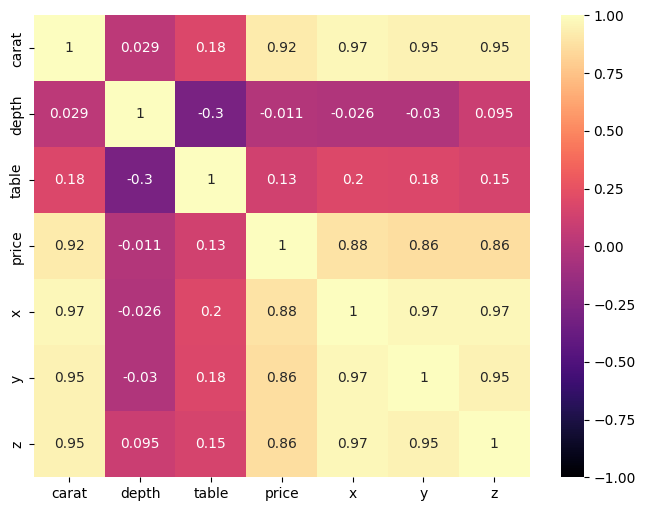

In [4]:
plt.figure(figsize = (8, 6))
sns.heatmap((diamonds[["carat", "depth", "table", "price", "x", "y", "z"]]).corr(), vmin = -1, vmax = 1, annot = True, cmap = 'magma')
plt.show()

Abaixo estamos realizando o processo de separação da base de dados diamonds. Para que assim, o processo de machine learn seja mais efetivo.

- Cut tem 5 tipos de classificação Ideal, Premium, Good, Very Good e Fair

- Color tem 7 tipos de classificação E, I, J, H, F, G e D

- Clarity tem 8 tipos de classificação SI2, SI1, VS1, VS2, VVS2, VVS1, I1 e IF

# **Implementação do K-NN**

Colocando medições iguais a 0 de comprimento, largura e/ou profundidade de um diamante como NaN

In [5]:
for x in range(diamonds.shape[0]):
    for y in range(7, diamonds.shape[1]):
        if diamonds.iloc[x, y] == 0: diamonds.iloc[x, y] = np.nan
        elif diamonds.iloc[x, y] >= 30: diamonds.iloc[x, y] = np.nan
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,NaN,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,NaN,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


Abaixo está a implementação do K-NN nas colunas numéricas

In [6]:
'''Algumas livros aconselham usar a formula (K = log n) onde n é o numero de linhas da base de dados.
Para assim definir a quantidade de K.'''

classificacao = KNNImputer(n_neighbors = round(math.log(diamonds.shape[0])))
diamonds[["carat", "depth", "table", "price", "x", "y", "z"]] = classificacao.fit_transform(diamonds[["carat", "depth", "table", "price", "x", "y", "z"]])

#classificacao.fit(X_train, y_train)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.172727,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.900000,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.400000,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.300000,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,62.527273,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.100000,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.800000,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.000000,58.0,2757.0,6.15,6.12,3.74


Aplicação do K-NN para colunas categóricas

In [7]:
'''KNN para valores categóricos'''
encoder = OrdinalEncoder()
diamonds_encoder = encoder.fit_transform(diamonds)

knn_imputer = KNNImputer(n_neighbors = round(math.log(diamonds.shape[0])))
diamonds_imputer = knn_imputer.fit_transform(diamonds_encoder)

diamonds_imputer = pd.DataFrame(diamonds_imputer, columns = diamonds.columns)
diamonds_imputer = encoder.inverse_transform(diamonds_imputer)

# Substituindo os valores faltantes na base de dados diamonds principal
for x in range(diamonds.shape[0]):
    for y in range(1, 4):
        if pd.isna(diamonds.iloc[x, y]): diamonds.iloc[x, y] = diamonds_imputer[x][y]

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.500000,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.172727,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.900000,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.400000,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.300000,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,62.527273,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.100000,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.800000,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.000000,58.0,2757.0,6.15,6.12,3.74


Abaixo estamos normalizando as colunas numéricas.

In [8]:
#padronização das colunas numéricas
diamonds[["carat", "x", "y", "z"]] = round(diamonds[["carat", "x", "y", "z"]], 2)
diamonds[["table", "price"]] = round(diamonds[["table", "price"]])
diamonds["depth"] = round(diamonds["depth"], 1)

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.2,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,62.5,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


Salvando a base de dados já limpa e sem valores faltantes

In [9]:
path = r"DataBases\Diamonds_limpa.csv"
try:
    pd.read_csv(f"{path}")
    print(f"Já existe esse dataframe no diretório: {path}")
except FileNotFoundError:
    diamonds.to_csv(fr"{path}", index = False)
    print(f'''Base de dados limpa adicionada ao diretório:
          {path}
          com sucesso!!''')


Já existe esse dataframe no diretório: DataBases\Diamonds_limpa.csv


# Análise da relação de preço das colunas numéricas

**INFORMAÇÕES IMPORTANTES:**
- 1 Quilate equivale a 200mg
- 1 Ponto equivale a 0,01 quilates

O gráfico abaixo compara a relação do comprimento de um diamante com o carat e com o preço

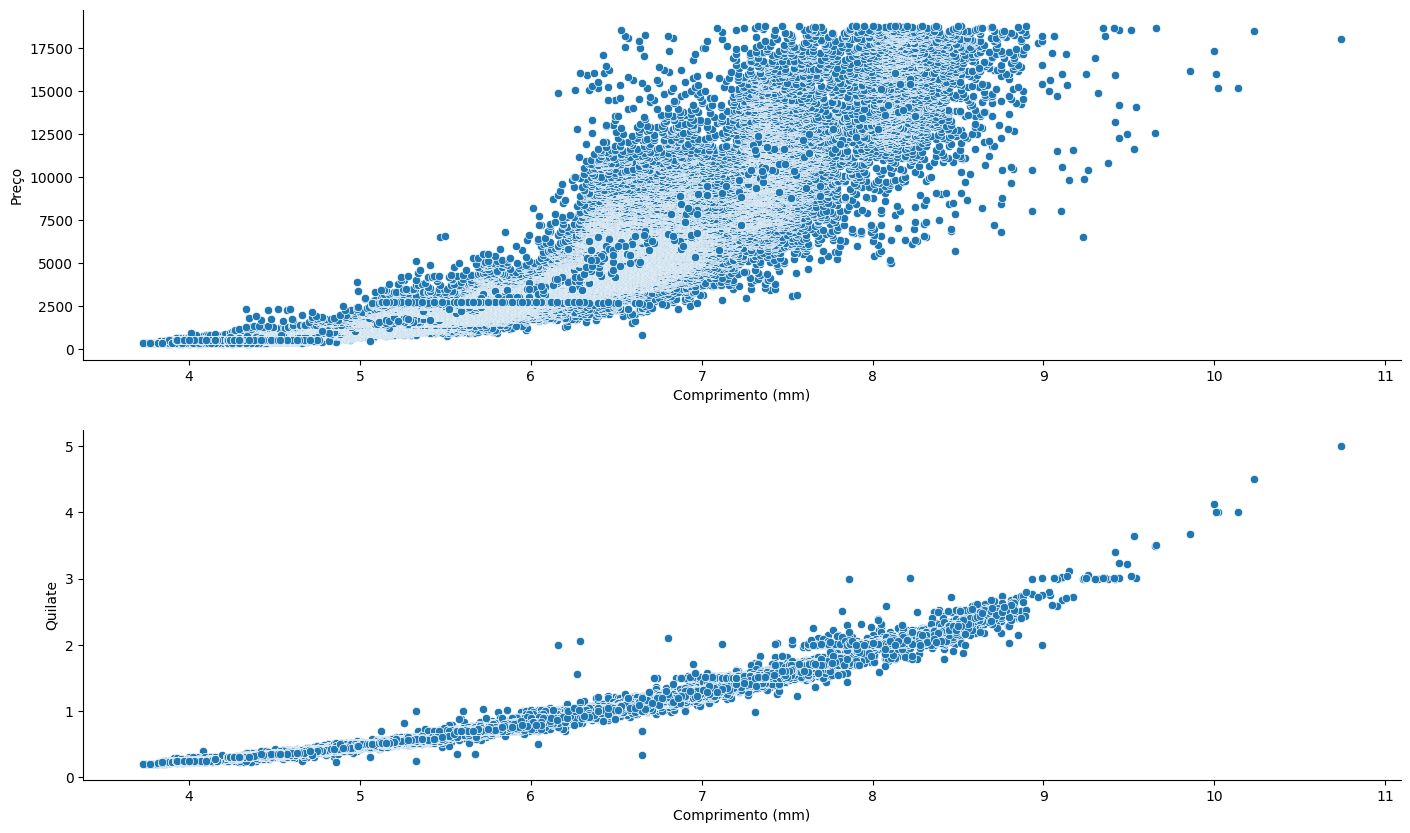

In [10]:
plt.figure(figsize=(17, 10))

plt.subplot(2, 1, 1)
sns.scatterplot(data=diamonds, x = "x", y = "price")
plt.xlabel("Comprimento (mm)")
plt.ylabel("Preço")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.subplot(2, 1, 2)
sns.scatterplot(data=diamonds, x = "x", y = "carat")
plt.xlabel("Comprimento (mm)")
plt.ylabel("Quilate")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.show()

O gráfico abaixo compara a relação da largura de um diamante com o carat e com o preço

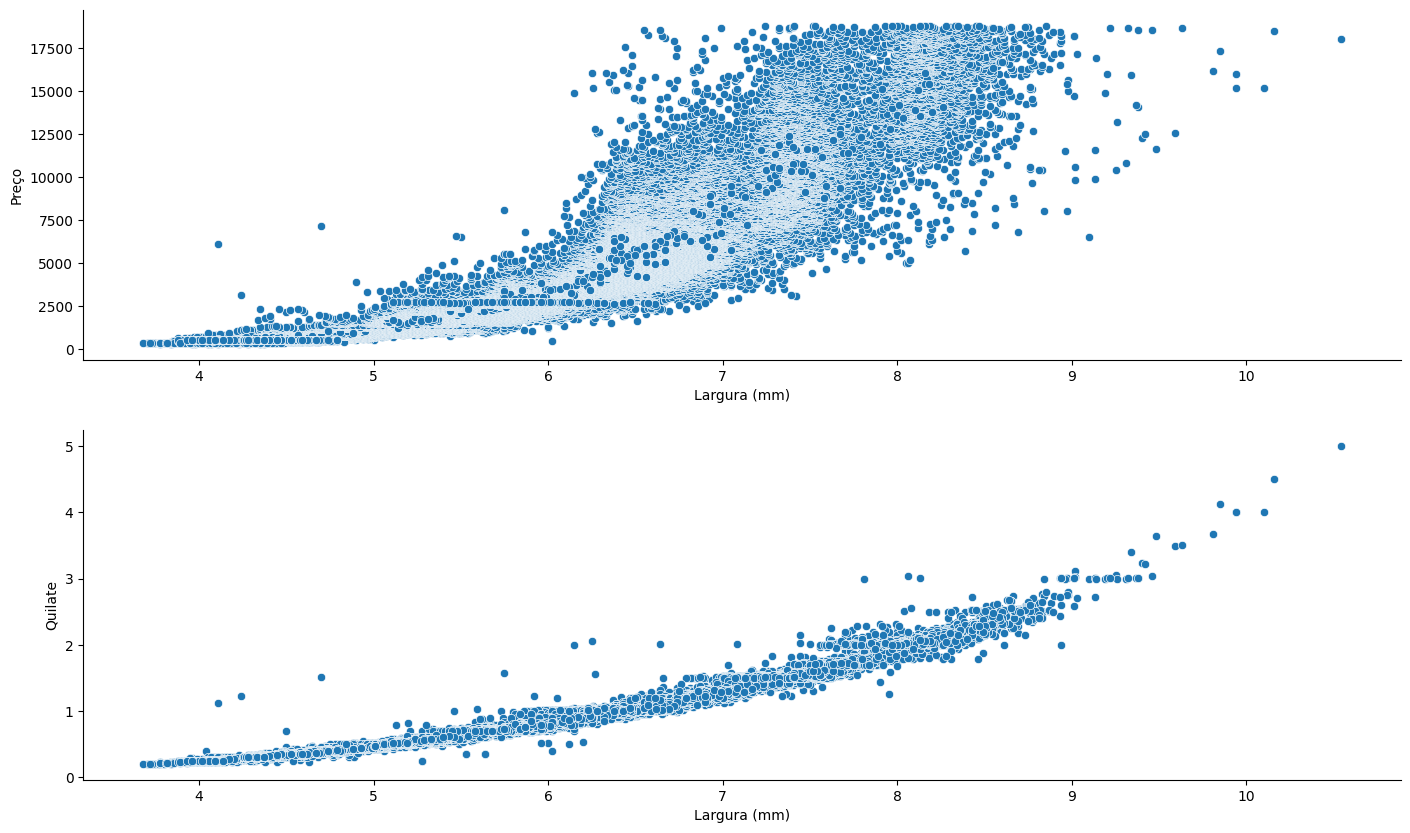

In [11]:
plt.figure(figsize=(17, 10))

plt.subplot(2, 1, 1)
sns.scatterplot(diamonds, x = "y", y = "price")
plt.xlabel("Largura (mm)")
plt.ylabel("Preço")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.subplot(2, 1, 2)
sns.scatterplot(diamonds, x = "y", y = "carat")
plt.xlabel("Largura (mm)")
plt.ylabel("Quilate")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.show()

O gráfico abaixo compara a relação da profundidade de um diamante com o carat e com o preço

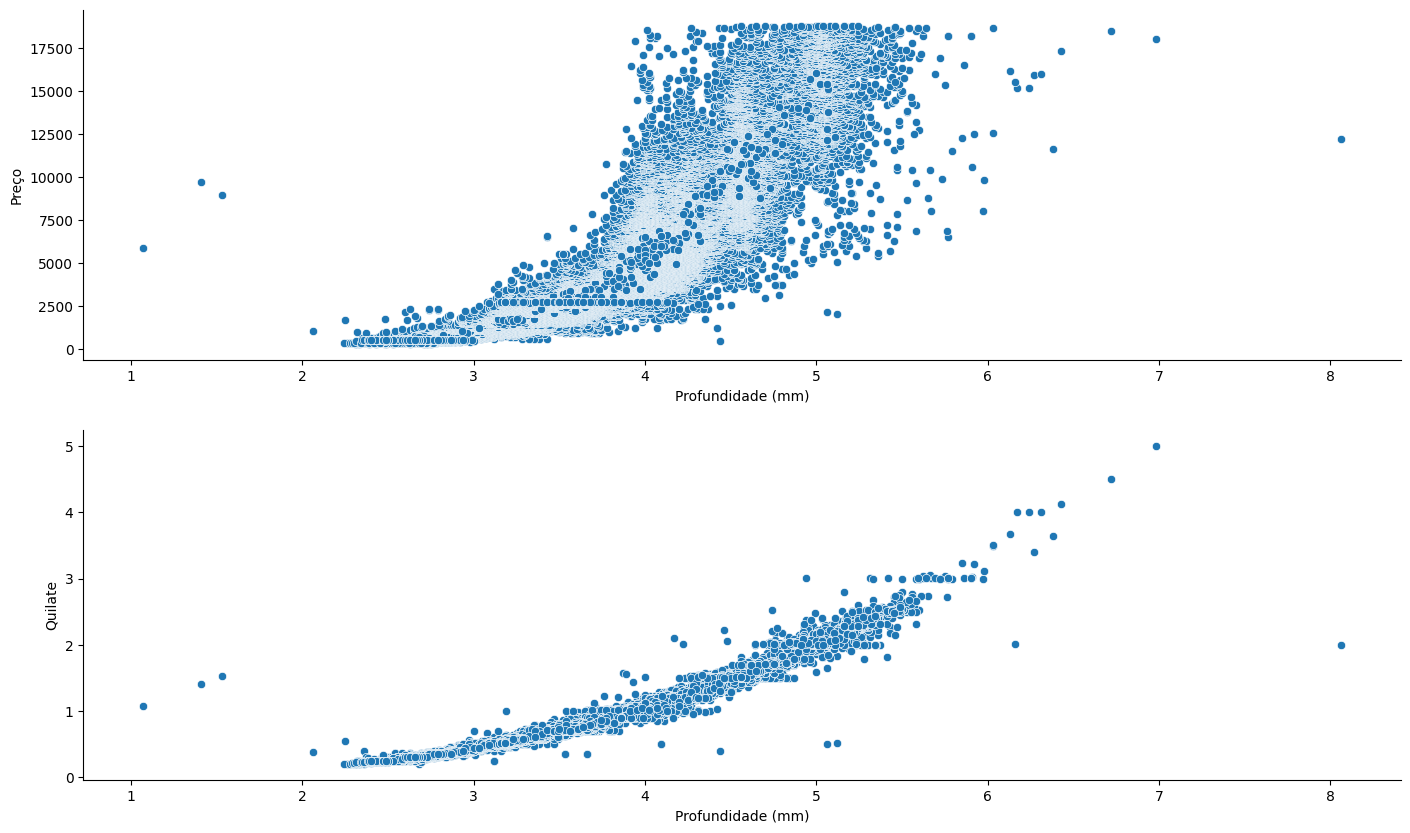

In [12]:
plt.figure(figsize=(17, 10))

plt.subplot(2, 1, 1)
sns.scatterplot(diamonds, x = "z", y = "price")
plt.xlabel("Profundidade (mm)")
plt.ylabel("Preço")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.subplot(2, 1, 2)
sns.scatterplot(diamonds, x = "z", y = "carat")
plt.xlabel("Profundidade (mm)")
plt.ylabel("Quilate")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.show()

O gráfico abaixo compara a relação do quilate de um diamante com o preço

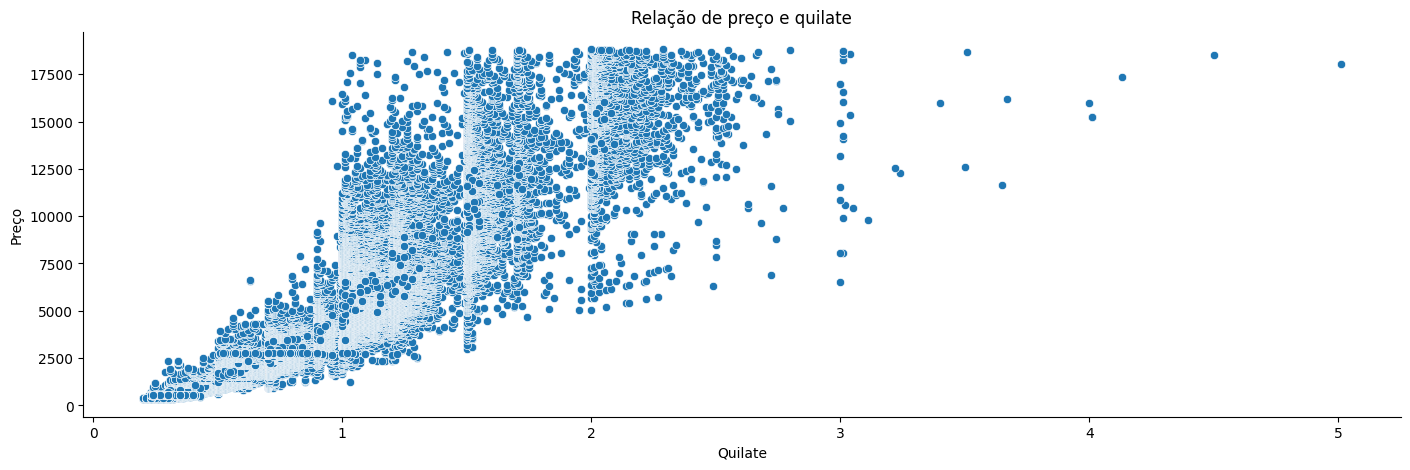

In [13]:
plt.figure(figsize=(17, 5))
sns.scatterplot(diamonds, x = "carat", y = "price")
plt.xlabel("Quilate")
plt.ylabel("Preço")
plt.title("Relação de preço e quilate")
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.show()

Com base nos gráficos apresentados, é evidente que o comprimento, largura e profundidade de um diamante têm uma relação mais confiável com seu peso em quilates do que com seu preço. Portanto, ao determinar o valor de um diamante com o mínimo de medidas necessárias, podemos confiar nos dados de quilates fornecidos. As dimensões físicas, como comprimento, largura e profundidade, oferecem uma indicação mais precisa do peso do diamante do que do seu valor monetário.

Entretanto, é importante ressaltar que isso não significa que não podemos usar as medidas de comprimento, largura e profundidade para estimar o valor de um diamante. Pelo contrário, quanto mais informações tivermos, mais precisa será a estimativa do preço do diamante. No entanto, se tivermos que escolher o mínimo de informações para estimar o valor de um diamante, podemos afirmar que o quilate é suficiente para essa avaliação.

#### **Existem 2 formar de estimar o quilate do diamante para o usuário do programa:**
1) Solicitar a massa do diamante para o cliente, e com isso realizar o cálculo:   
$$ \text{Quilate} = \frac{\text{Massa (mg)}}{200}$$

2) Para a segunda forma de estimar o quilate do diamante, é necessário 4 coisas: Comprimento (mm), Largura (mm), Profundidade (mm) e densidade ($\frac{mm}{mm³}$). Com isso utilizaremos o cálculo da densidade de um objeto, para assim cálcular primeiramante a massa do diamante: $$Densidade = \frac{Massa}{Volume} \rightarrow Massa = Densidade \times Volume $$ Entretanto temos um problema, não temos o volume do diamante, entretanto para isso, iremos dismenbrar o cálculo do volume de um objeto, sendo: $$Volume = Comprimento \times Largura \times Profundidade$$ Substituindo na fórmula então, ficará: $$Massa = Comprimento \times Largura \times Profundidade \times Densidade$$ Agora teremos de descobrir o quilate do diamante, para isso, usaremos a forma 1 de estimar o cálculo do diamante: $$Quilate = \frac{Massa (mg)}{200}$$ Ficando na fórmula geral: $$Quilate = \frac{Comprimento \times Largura \times Profundidade \times Densidade}{200} $$

# Relação de preço com as colunas categóricas

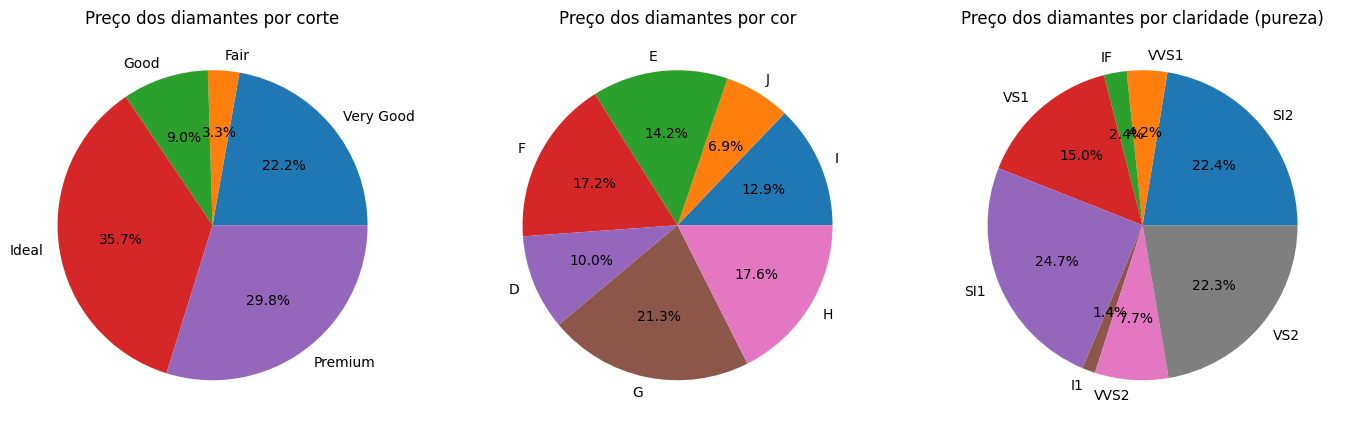

In [14]:
plt.figure(figsize=(17,9))
plt.subplot(1, 3, 1)
aux = [0 for x in range(len(list(set(diamonds["cut"]))))]
setting = list(set(diamonds["cut"]))
for x in range(diamonds.shape[0]):
    for y in range(len(setting)):
        if setting[y] == diamonds.loc[x, "cut"]: 
            aux[y]+= diamonds.loc[x, "price"]
            break
plt.pie(aux, labels=list(set(diamonds["cut"])), autopct="%1.1f%%")
plt.title("Preço dos diamantes por corte")

plt.subplot(1, 3, 2)
aux = [0 for x in range(len(list(set(diamonds["color"]))))]
setting = list(set(diamonds["color"]))
for x in range(diamonds.shape[0]):
    for y in range(len(setting)):
        if setting[y] == diamonds.loc[x, "color"]: 
            aux[y]+= diamonds.loc[x, "price"]
            break
plt.pie(aux, labels=list(set(diamonds["color"])), autopct="%1.1f%%")
plt.title("Preço dos diamantes por cor")

plt.subplot(1, 3, 3)
aux = [0 for x in range(len(list(set(diamonds["clarity"]))))]
setting = list(set(diamonds["clarity"]))
for x in range(diamonds.shape[0]):
    for y in range(len(setting)):
        if setting[y] == diamonds.loc[x, "clarity"]: 
            aux[y]+= diamonds.loc[x, "price"]
            break
plt.pie(aux, labels=list(set(diamonds["clarity"])), autopct="%1.1f%%")
plt.title("Preço dos diamantes por claridade (pureza)")

plt.show()